In [45]:
import pandas as pd
import numpy as np

In [46]:
wine = pd.read_csv('dataset_191_wine.csv')
wine.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Заметим, что в датасете всего 3 класса

In [47]:
wine.tail()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


# Сведение к задаче регрессии и обработка данных

Заменяем целевой признак(колонку класса) на n числовых колонок с помощью OneHot преобразования(n - кол-во классов)
Также мы видим, что в датасете нет нечисловых признаков

In [48]:
one_hot = pd.get_dummies(wine['class'])
print(one_hot)

wine = wine.drop(['class'], axis=1)
wine.head()

     1  2  3
0    1  0  0
1    1  0  0
2    1  0  0
3    1  0  0
4    1  0  0
..  .. .. ..
173  0  0  1
174  0  0  1
175  0  0  1
176  0  0  1
177  0  0  1

[178 rows x 3 columns]


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Нормализуем датасет (Z- нормализация)

In [49]:
norm_col = (wine - wine.mean()) / wine.std()
wine[wine.columns] = norm_col
wine.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


# Реализация алгоритма и настройка гиперпараметров, анализ результатов

Реализуем функции расстояния(Евклида, Манхэтенна, Чебышева)

In [50]:
def euclidean(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

def manhattan(a, b):
    return np.sum(np.abs(a - b))

def chebyshev(a, b):
    return np.max(np.abs(a - b))

metrics = (euclidean, manhattan, chebyshev)

In [51]:
a = np.array([5, 5, 5, 5])
b = np.array([10, 10, 10, 10])
print(f'Евклид: {euclidean(a, b)}') # sqrt((10 - 5)^2 + (10 - 5)^2 + (10 - 5)^2 + (10 - 5)^2) = sqrt(100) = 10
print(f'Манхэттен: {manhattan(a, b)}') # |10 - 5| + |10 - 5| + |10 - 5| + |10 - 5| = 20
print(f'Чебышев: {chebyshev(a, b)}') # max(|10 - 5|, |10 - 5|, |10 - 5|, |10 - 5|) = 5

Евклид: 10.0
Манхэттен: 20
Чебышев: 5


Реализуем функции ядра

In [52]:
def check(u) :
    if abs(u) <= 1:
        return 1
    else:
        return 0

def uniform(u):
    return 0.5 * check(u)

def triangular(u):
    return (1 - abs(u)) * check(u)

def epanechnikov(u):
    return (3 / 4 * (1 - pow(u, 2))) * check(u)

def quartic(u):
    return (15 / 16 * pow((1 - pow(u, 2)), 2)) * check(u)

kernels = (uniform, triangular, epanechnikov, quartic)

In [53]:
u = 5
print(f'Uniform: {uniform(u)}') # 1/2
print(f'Triangular: {triangular(u)}') # 1 - |5| = -4
print(f'Epanechnikov: {epanechnikov(u)}') # 3/4 * (1 - 5^2) = -18
print(f'Quartic: {quartic(u)}') # 15/16 * (1 - 5^2)^2 = 540

Uniform: 0.0
Triangular: 0
Epanechnikov: -0.0
Quartic: 0.0


Реализуем для окон нефиксированной ширины нахождение k ближайших соседей

In [54]:
def find_neighbours(x, xs, distance, k):
    distances_all = []
    for xv in xs.values:
        distances_all.append(distance(x, xv))
    neighbours = []
    max_distance = np.argmax(distances_all)
    for i in range(k):
        index = np.argmin(distances_all)
        neighbours.append(index)
        distances_all[index] = distances_all[max_distance]
    return neighbours

Реализуем формулу Надарая-Ватсона.

In [55]:
def nadaraya_watson(x, x_train, y_train, dist, ker, h):
    numerator = sum(y_i * ker(dist(x, x_i) / h) for x_i, y_i in zip(x_train.values, y_train.values)) if h != 0 else sum(y_i * ker(0) for y_i in y_train.values)
    denominator = sum(ker(dist(x, x_i) / h) for x_i in x_train.values) if h != 0 else sum(ker(0) for _ in x_train.values)

    return numerator / denominator

Реализуем подсчёт F-меры

In [56]:
def f_measure(matrix, w):
    recall = []
    recallWeight = 0

    for i in range(len(matrix)):
        if sum(matrix[i]) != 0:
            recall.append(matrix[i][i] / sum(matrix[i]))
        else:
            recall.append(0)

    for i in range(len(recall)):
        recallWeight += sum(matrix[i]) * recall[i]
    recallWeight /= w

    precision = []
    precisionWeight = 0

    for i in range(len(matrix)):
        if (sum(matrix[i])) != 0:
            precision.append(matrix[i][i] / sum([row[i] for row in matrix]))
        else:
            precision.append(0)

    for i in range(len(precision)):
        precisionWeight += sum(matrix[i]) * precision[i]
    precisionWeight /= w

    if precisionWeight + recallWeight == 0:
        return 0
    else:
        return (2 * precisionWeight * recallWeight) / (precisionWeight + recallWeight)

И реализуем Leave-one-out

In [57]:
number_of_classes = 3

def leave_one_out(dtrain, ys, distance, kernel, h):
    confusion_matrix = []
    for i in range(3):
        confusion_matrix.append([0, 0, 0])

    for i in range(len(dtrain)):
        object_for_prediction = dtrain.iloc[i]
        d_left = dtrain.drop(i)
        d_left.index = range(len(d_left))

        real_class = ys.iloc[i]

        classes_left = ys.drop(i)
        classes_left.index = range(len(classes_left))
        prediction =  np.argmax(nadaraya_watson(object_for_prediction, d_left, classes_left, distance, kernel, h(i)))
        correct = 0
        for j in range(len(real_class)):
            if real_class.iloc[j] == 1:
                correct = j
                break
        confusion_matrix[prediction][correct] += 1
    return f_measure(confusion_matrix, len(dtrain))

Теперь переберём всё это, чтобы найти лучшие гиперпараметры

In [58]:
def find_best_parameters_fix_window(x, y):
    f_best = 0
    param_best = []
    for metric in metrics:
        print('--------------------')
        print(f'DISTANCE: {metric.__name__}')

        max_dist = 0
        for xi in x.values:
            for xj in x.values:
                max_dist = max(max_dist, metric(xi, xj))
        print(f'Max distance: {max_dist}')
        step = max_dist / np.sqrt(len(x))

        for kernel in kernels:
            print('----------')
            print(f'KERNEL: {kernel.__name__}')
            h = step
            while h <= max_dist:
                f = leave_one_out(x, y, metric, kernel, lambda _: h)
                print(f'h: {h}, f: {f}')
                if f > f_best:
                    f_best = f
                    param_best = [metric, kernel, h]
                h += step
            print(f'current f_best: {f_best}')
            print('----------')
    print('--------------------')
    print(f'Best f: {f_best}')
    print(f'Parameters: {param_best}')
    return param_best

parameters = find_best_parameters_fix_window(wine, one_hot)

--------------------
DISTANCE: euclidean
Max distance: 11.179958739325548
----------
KERNEL: uniform


/tmp/ipykernel_14810/1584757456.py:5: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator


h: 0.837973335679072, f: 0.49789029535864976
h: 1.675946671358144, f: 0.6955367344527429
h: 2.513920007037216, f: 0.8927118613694605
h: 3.351893342716288, f: 0.9626088510565197
h: 4.18986667839536, f: 0.9677143145883671
h: 5.027840014074432, f: 0.844348961356555
h: 5.865813349753504, f: 0.7230946640620032
h: 6.703786685432576, f: 0.5650423323813007
h: 7.541760021111648, f: 0.5741531572619096
h: 8.37973335679072, f: 0.570281124497992
h: 9.217706692469791, f: 0.570281124497992
h: 10.055680028148863, f: 0.570281124497992
h: 10.893653363827935, f: 0.570281124497992
current f_best: 0.9677143145883671
----------
----------
KERNEL: triangular
h: 0.837973335679072, f: 0.49789029535864976
h: 1.675946671358144, f: 0.6955367344527429
h: 2.513920007037216, f: 0.9031885392864804
h: 3.351893342716288, f: 0.9575815307712161
h: 4.18986667839536, f: 0.9728981873792321
h: 5.027840014074432, f: 0.9781606917901725
h: 5.865813349753504, f: 0.9781606917901725
h: 6.703786685432576, f: 0.9721457860629209
h: 7

Построим график

In [59]:
r = 0
for xi in wine.values:
    for xj in wine.values:
        r = max(r, parameters[0](xi, xj))
h_ = st = r / np.sqrt(len(wine))

f_values = []
while h_ <= r:
    f_values.append(leave_one_out(wine, one_hot, parameters[0], parameters[1], lambda _: h_))
    h_ += st

/tmp/ipykernel_14810/1584757456.py:5: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator


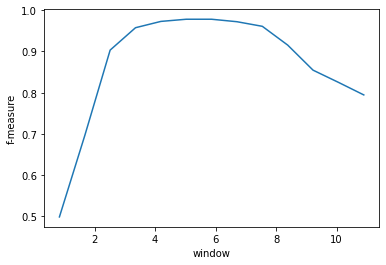

In [60]:
import matplotlib.pyplot as plt

sqrt = np.sqrt(len(wine))
hs = range (1, round(sqrt) + 1)
hs = hs * r / sqrt

plt.plot(hs, f_values)
plt.ylabel("f-measure")
plt.xlabel("window")
plt.show()

In [62]:
def find_best_parameters_unfix_window(x, y):
    f_max = 0.
    param_max = []
    sqrt_d = round(np.sqrt(len(x))) + 1
    for metric in metrics:
        print('--------------------')
        print(f'DISTANCE: {metric.__name__}')

        neighbors = []
        for i in range(0, len(x)):
            x_train = x.drop(i, axis=0)
            x_i = x.iloc[i]
            neighbors.append(find_neighbours(x_i, x_train, metric, sqrt_d))

        for kernel in kernels:
            print('----------')
            print(f'KERNEL: {kernel.__name__}')
            for i in range(sqrt_d):
                f_cur = leave_one_out(x, y, metric, kernel, lambda j: neighbors[j][i])
                if f_cur > f_max:
                    f_max = f_cur
                    param_max = [metric, kernel, i]
                print(f'f: {f_cur}')
            print('----------')
            print("current f_max:", f_max)
    print('--------------------')
    print(f'max f-measure: {f_max}')
    if len(param_max) >= 3:
        print("parameters:", param_max[0].__name__, ",", param_max[1].__name__, ",", param_max[2])
    return param_max

other_parameters = find_best_parameters_unfix_window(wine, one_hot)

--------------------
DISTANCE: euclidean
----------
KERNEL: uniform
f: 0.584511197737522


/tmp/ipykernel_14810/1584757456.py:5: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator


f: 0.5848187299151276
f: 0.5893668555465058
f: 0.570281124497992
f: 0.5982804647582252
f: 0.5937373064859466
f: 0.5937373064859466
f: 0.5798226867657348
f: 0.584511197737522
f: 0.5708592679418488
f: 0.5982804647582252
f: 0.5798226867657348
f: 0.5750802240461063
f: 0.5937373064859466
----------
current f_max: 0.5982804647582252
----------
KERNEL: triangular
f: 0.6290441120873471
f: 0.6158715077269912
f: 0.6499474638923399
f: 0.6116643391536372
f: 0.63758696641266
f: 0.6544951284983593
f: 0.6290441120873471
f: 0.6072411180365445
f: 0.6027807845349351
f: 0.6069656540809264
f: 0.63758696641266
f: 0.6247403081840319
f: 0.6115326832340987
f: 0.6333253581474826
----------
current f_max: 0.6544951284983593
----------
KERNEL: epanechnikov
f: 0.5982804647582252
f: 0.6115326832340987
f: 0.6244785424175303
f: 0.5891484831422474
f: 0.6204110241620066
f: 0.63758696641266
f: 0.6160533394510327
f: 0.6027807845349351
f: 0.5982804647582252
f: 0.5937416137314944
f: 0.6247403081840319
f: 0.593737306485946

KeyboardInterrupt: 

In [64]:
neighbors = []
for i in range(len(wine)):
    x_train = wine.drop(i, axis=0)
    x_i = wine.iloc[i]
    neighbors.append(find_neighbours(x_i, x_train, other_parameters[0], round(sqrt)))

f_other_values = []
for i in range(round(sqrt)):
    f_other_values.append(leave_one_out(wine, one_hot, other_parameters[0], other_parameters[1], lambda j: neighbors[j][i]))

NameError: name 'other_parameters' is not defined

In [ ]:
plt.plot(range(1, round(sqrt) + 1), f_other_values)
plt.ylabel("f-measure")
plt.xlabel("window")
plt.show()